In [1]:
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, TensorDataset
import torchvision.datasets as datasets
from torchvision import transforms
import PIL
import ConvexHullDataset as mixup
from importlib import reload
import matplotlib.pyplot as plt

mixup = reload(mixup)

In [140]:


# Test with loading and mixing FMNIST: 
fmnist_root = "./fmnist"
fmnist = torchvision.datasets.FashionMNIST(fmnist_root, train=True, download=True)

# transform data to [-1 1] scale
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                               std=[0.5, 0.5, 0.5])
maxn = 10
fcvx = mixup.ConvexHullDataset(
    fmnist, 
    batchsize=3000, 
    maxneighbors=maxn, 
    limitdata = 100, 
    store=True)

Datatype of feature vectors: <class 'PIL.Image.Image'>
On row batch 1 of 1
Computing sample 1 of 200


tensor([[0],
        [6]])
tensor([0.5435, 0.4565], dtype=torch.float64)


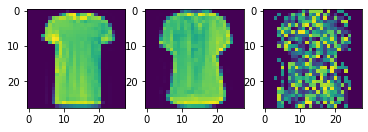

In [141]:
exampleidx = 90
fig, axes = plt.subplots(1,fcvx.averageneighbors + 1)
targets = []
for (idx, pair) in enumerate(fcvx.getcomponents(exampleidx)):
    axes[idx].imshow(pair[0])
    targets.append(pair[1])
cvxim = fcvx[exampleidx][0]
cvxtarget = fcvx[exampleidx][1]
weights = fcvx[exampleidx][2]
print(cvxtarget)
print(weights)
axes[fcvx.averageneighbors].imshow(cvxim)

In [142]:
m = torch.empty(2,1, dtype=torch.long)
m[0]

tensor([48])

In [8]:
# Test with CIFAR10

CIFAR_traindataset= datasets.CIFAR10(root='./cifar10', train=True, download=True)

# transform data to [-1, 1] scale
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                               std=[0.5, 0.5, 0.5])
maxn = 10
CIFAR_cvx_traindataset = mixup.ConvexHullDataset(
    CIFAR_traindataset, 
    batchsize=3000, 
    maxneighbors=maxn,
    transform=transforms.Compose([
#        transforms.RandomHorizontalFlip(),
#        transforms.RandomCrop(32, 4),
       transforms.ToTensor(),
        normalize,
    ]), 
    limitdata=5000,
    store=True)

Files already downloaded and verified
Datatype of feature vectors: <class 'PIL.Image.Image'>
On row batch 1 of 2
On row batch 2 of 2
Computing sample 1 of 10000
Computing sample 1001 of 10000
Computing sample 2001 of 10000
Computing sample 3001 of 10000
Computing sample 4001 of 10000
Computing sample 5001 of 10000
Computing sample 6001 of 10000
Computing sample 7001 of 10000
Computing sample 8001 of 10000
Computing sample 9001 of 10000
